In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### 아파트 거래 데이터 로드
(지역코드, 법정동, 거래일, 아파트, 지번, 전용면적(m^2), 층, 건축년도, 거래금액(만원))
  
ex. '31110', '학성동', '5/30/2020 0:00', '남운학성타운', '379', '135.58', '8', '1991', '26700'

In [2]:
data = pd.read_csv("ApartDeal.csv")

print(data)

/home/pyspark/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


          지역코드       법정동                  거래일          아파트      지번      전용면적  \
0        31110       학성동       5/30/2020 0:00       남운학성타운     379  135.5800   
1        31110       남외동        1/3/2020 0:00     남외푸르지오1차   506-1  101.6000   
2        31110       남외동        1/3/2020 0:00        에일린의뜰     500   84.9920   
3        31110       남외동        1/3/2020 0:00     남외푸르지오1차   506-1  118.7060   
4        31110       남외동        1/4/2020 0:00     남외푸르지오2차   501-1   84.9636   
...        ...       ...                  ...          ...     ...       ...   
4315698  50110  애월읍 하귀1리  2021-04-07 00:00:00  제주하귀휴먼시아2단지   166-1   84.8400   
4315699  50110   한림읍 한림리  2021-04-06 00:00:00           영신  1530-2   84.8700   
4315700  50130       동홍동  2021-03-26 00:00:00       동호아트리움    2196   74.9261   
4315701  50130       동홍동  2021-03-29 00:00:00       동홍동코아루     157   60.9375   
4315702  50130       동홍동  2021-03-31 00:00:00   주공5차(동홍5차)    1674   39.7900   

          층  건축년도   거래금액  
0         8 

#### 년도별 거래 평균액

거래일 포맷이 'yyyy-mm-dd 00:00:00'과 'mm/dd/yyyy 0:00'으로 두 가지가 있어서 포맷 확인 후 연도 추출

In [3]:
years = []
for date in data['거래일']:
    if date.find('/') != -1:
        years.append(int(date.split(' ')[0].split('/')[2]))
    else:
        years.append(int(date.split(' ')[0].split('-')[0]))

# 거래일에서 년도만 추출하여 새로운 column 생성
data['거래년도'] = years

In [4]:
byYear = pd.DataFrame(data.groupby(data['거래년도'])['거래금액'].mean()) # 년도별 평균 금액 계산
byYear.reset_index(level=['거래년도'], inplace=True)
byYear.rename(columns = {'거래금액':'Average amount', '거래년도':'year'}, inplace=True)
byYear

,year,Average amount
0,2015,26421.629142
1,2016,28241.569682
2,2017,31613.360199
3,2018,31933.362593
4,2019,31401.712225
5,2020,31837.655428
6,2021,26656.419129


[Text(0, 0.5, 'amount(10000won)')]

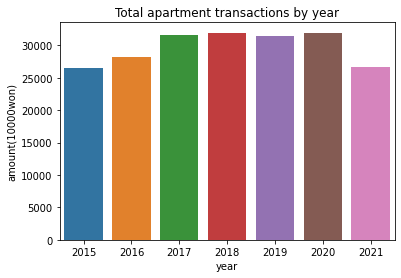

In [5]:
# 기본 막대 그래프
bar = sns.barplot(x="year", y="Average amount", data=byYear)
bar.set_title('Total apartment transactions by year')
bar.set(ylabel="amount(10000won)")

#### matplotlib의 annotate 함수를 이용하여 막대 그래프 위에 수치 표시하기

plt.annotate(contents, (x, y), style)

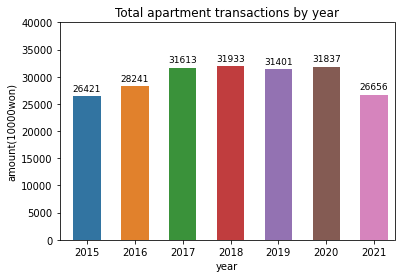

In [6]:
bar = sns.barplot(x="year", y="Average amount", data=byYear)
bar.set_title('Total apartment transactions by year')

bar.set(xlim=(0,49), ylim=(0,40000), xticks=np.arange(4,49,7), ylabel="amount(10000won)") # 그래프 축 범위, x축 눈금 간격 조정
bar.set_xticklabels([i for i in range(2015, 2022)]) # 눈금에 맞춰 x축 label 다시 작성

for i, p in enumerate(bar.patches):
    p.set_x(i*7+2) # 조정된 눈금만큼 x좌표 이동
    p.set_width(p.get_width()*5) # 막대 너비 키우기 
    bar.annotate("%d"%p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()+(1e3)), ha='center', fontsize=9)

#### 연도별 아파트 금액 분포

In [7]:
catdata = pd.DataFrame(data[["거래금액", "거래년도"]])
catdata.rename(columns = {'거래금액':'amount', "거래년도": "year"}, inplace=True)
catdata

,amount,year
0,26700,2020
1,35500,2020
2,36500,2020
3,43000,2020
4,38700,2020
...,...,...
4315698,38500,2021
4315699,12000,2021
4315700,32500,2021
4315701,24100,2021


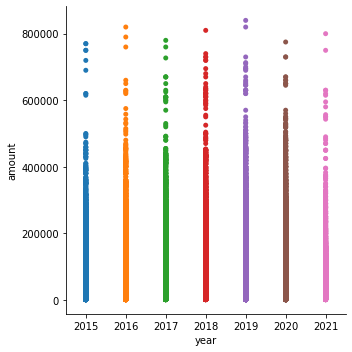

In [8]:
cat = sns.catplot(x="year", y="amount", jitter=False, data=catdata)

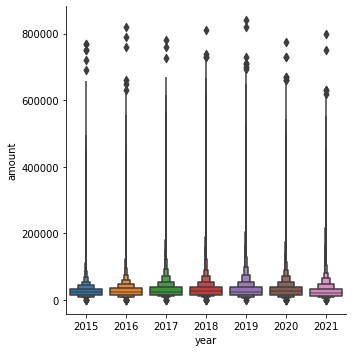

In [9]:
# 가격별 분포를 더 직관적으로 보기 위한 박스형 분포 그래프
diamonds = sns.catplot(x="year", y="amount", kind="boxen", data=catdata)

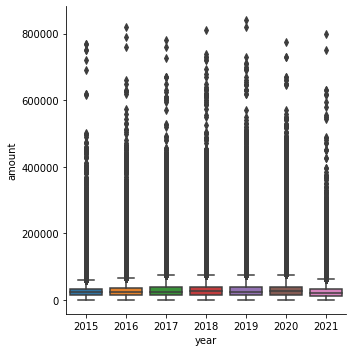

In [10]:
# 평균과 분포를 함께 보기 위한 박스형 분포 그래프
sns.catplot(x="year", y="amount",kind="box", dodge=False, data=catdata)

#### 지역별 아파트 평균거래금액

In [13]:
byArea = pd.DataFrame(data.groupby(['거래년도','지역코드'])['거래금액'].mean())
byArea.reset_index(level=['거래년도', '지역코드'], inplace=True)
byArea.rename(columns = {'거래년도':'Year','지역코드':'Area code', '거래금액':'Average amount'}, inplace=True)
byArea

,Year,Area code,Average amount
0,2015,11110,48980.566826
1,2015,11140,53790.220558
2,2015,11170,77461.500230
3,2015,11200,52795.602257
4,2015,11215,56347.511492
...,...,...,...
1731,2021,48870,15865.384615
1732,2021,48880,16431.681416
1733,2021,48890,10972.272727
1734,2021,50110,28641.180743


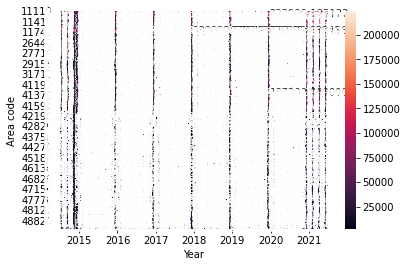

In [16]:
heatdata = byArea.pivot("Area code", "Year", "Average amount")
heat = sns.heatmap(heatdata, annot=True, fmt="f")